# Data Cube

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS
- creation date : January 7th 2027  

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import sys
sys.path.append('../')

In [2]:
import os

In [3]:
print(sys.executable)
print(sys.version)
#print(sys.version_info)

/users/dagoret/anaconda3/bin/python
3.8.8 (default, Apr 13 2021, 12:59:45) 
[Clang 10.0.0 ]


In [4]:
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [5]:
!ls data

20200211-holo-4-003-uniformity-datacube.npy


# Utility Functions

In [6]:
def get_list_of_position(arr):
    """
    Return the list of positions
    """
    
    
    ListOfPositions = [] 
    arrsize=len(arr)
    Npos=0
    
    for idx in np.arange(arrsize):
    
        currentposition = (arr[idx][1], arr[idx][2] )
    
        if currentposition not in ListOfPositions:
            ListOfPositions.append(currentposition)
            Npos+=1
            
            
    return Npos, ListOfPositions
    

In [7]:
def get_list_of_transmissions(arr):
    """
    
    """
    
    Narr=len(arr)
    Npos,list_of_position = get_list_of_position(arr)
    
    collectedtransmissions = np.empty(Npos, dtype=np.object)
    
    for idx in np.arange(Narr):   
        currentposition = (arr[idx][1], arr[idx][2])
        currentvalues = (arr[idx][3],arr[idx][4], arr[idx][5] )
  
    
        idx2=-1
        for position in list_of_position:
            idx2+=1
            
            if position == currentposition:
            
                if collectedtransmissions[idx2] == None:
                    collectedtransmissions[idx2] = []
                    collectedtransmissions[idx2].append(currentvalues)
                else:
                    collectedtransmissions[idx2].append(currentvalues)
                       
    
    return collectedtransmissions    
       

# Read Input file

In [8]:
datadir="data"
files_list= os.listdir(datadir)
print(files_list)
filename=files_list[0]
fullfilename=os.path.join(datadir,filename)
print(fullfilename)

['20200211-holo-4-003-uniformity-datacube.npy']
data/20200211-holo-4-003-uniformity-datacube.npy


In [9]:
arr=np.load(fullfilename)

In [10]:
arr.shape

(3443,)

In [11]:
NARR=arr.shape[0]

In [12]:
arr

array([(0,  0.,  0., 400.014, 0.28404813, 7.02226350e-04),
       (0,  0.,  0., 419.989, 0.09057611, 2.22853061e-04),
       (0,  0.,  0., 440.023, 0.02899506, 5.77351450e-05), ...,
       (2, -4., -4., 519.984, 0.06957727, 9.21319092e-05),
       (2, -4., -4., 540.001, 0.05970568, 7.87463120e-05),
       (2, -4., -4., 559.997, 0.03172864, 4.54447038e-05)],
      dtype=[('order', '<i8'), ('dx', '<f8'), ('dy', '<f8'), ('wl', '<f8'), ('DE', '<f8'), ('DE_std', '<f8')])

In [13]:
order0 = arr["order"]== 0
order1 = arr["order"]== 1
order2 = arr["order"]== 2

In [14]:
arr_0 = arr[order0]
arr_1 = arr[order1]
arr_2 = arr[order2]

# Order 1

## List of positions

In [15]:
Npos1,list_of_position_1 = get_list_of_position(arr_1)

In [16]:
Npos1

48

In [17]:
print(list_of_position_1)

[(0.0, 0.0), (0.0, 1.0), (0.0, 2.0), (0.0, 4.0), (0.0, -1.0), (0.0, -2.0), (0.0, -4.0), (1.0, 0.0), (1.0, 1.0), (1.0, 2.0), (1.0, 4.0), (1.0, -1.0), (1.0, -2.0), (1.0, -4.0), (2.0, 0.0), (2.0, 1.0), (2.0, 2.0), (2.0, 4.0), (2.0, -1.0), (2.0, -2.0), (2.0, -4.0), (4.0, 0.0), (4.0, 1.0), (4.0, 2.0), (4.0, 4.0), (4.0, -1.0), (4.0, -2.0), (-1.0, 0.0), (-1.0, 1.0), (-1.0, 2.0), (-1.0, 4.0), (-1.0, -1.0), (-1.0, -2.0), (-1.0, -4.0), (-2.0, 0.0), (-2.0, 1.0), (-2.0, 2.0), (-2.0, 4.0), (-2.0, -1.0), (-2.0, -2.0), (-2.0, -4.0), (-4.0, 0.0), (-4.0, 1.0), (-4.0, 2.0), (-4.0, 4.0), (-4.0, -1.0), (-4.0, -2.0), (-4.0, -4.0)]


In [18]:
len(list_of_position_1)

48

## Find the list of different positions

In [19]:
arr_1_ext = get_list_of_transmissions(arr_1)

<ipython-input-7-466b74409715>:9: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  collectedtransmissions = np.empty(Npos, dtype=np.object)


In [20]:
arr_1_ext

array([list([(400.014, 0.08113432020751664, 0.0004253119019335874), (419.989, 0.12204722120477443, 0.0005528540103098845), (440.023, 0.284278472426844, 0.000354299224153873), (459.966, 0.3078574663424993, 0.0003821479165009617), (479.965, 0.3094892134644252, 0.00038400269967797364), (500.021, 0.3117510441015642, 0.0003865603902908834), (519.984, 0.3137440396451491, 0.00038814322283485113), (540.001, 0.3057432204005373, 0.00037755880062014685), (559.997, 0.29572932835378696, 0.00036510376422183976), (579.972, 0.2789954155867061, 0.00034365951476988276), (599.999, 0.27221034565444824, 0.0003353242661302174), (620.003, 0.262478417420918, 0.0003231063036629244), (639.983, 0.25570255947710163, 0.0003143828759407265), (660.012, 0.24401572380960385, 0.0002998520486344919), (680.015, 0.2348525377870017, 0.0002884634375238189), (699.992, 0.22549142907719738, 0.0002765974929935576), (720.015, 0.21550731896352512, 0.0002645092387758762), (740.01, 0.20878474453391851, 0.000255805651175084), (759.9

## Plot transmissions

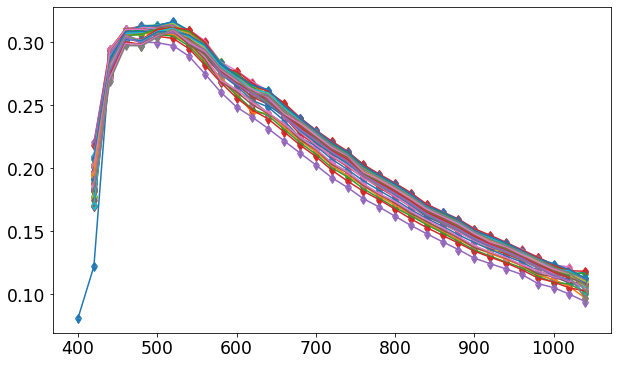

In [21]:
for idx in np.arange(Npos1):
    list_of_datapoints = arr_1_ext[idx]

    wl,eff,eeff = zip(*list_of_datapoints)
    
    plt.errorbar(wl,eff,yerr=eeff,uplims=True, lolims=True)
    

## Order 2

In [22]:
Npos2,list_of_position_2 = get_list_of_position(arr_2)

In [23]:
arr_2_ext = get_list_of_transmissions(arr_2)

<ipython-input-7-466b74409715>:9: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  collectedtransmissions = np.empty(Npos, dtype=np.object)


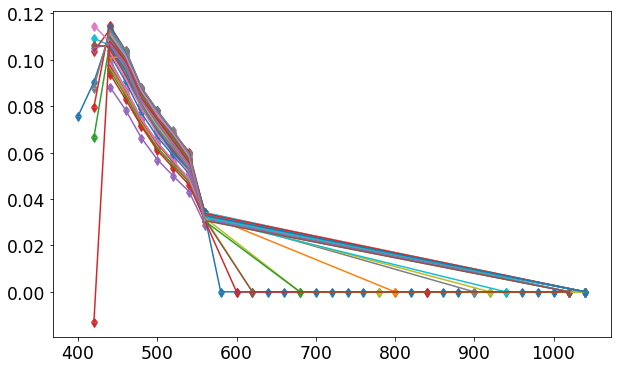

In [24]:
for idx in np.arange(Npos2):
    list_of_datapoints = arr_2_ext[idx]

    wl,eff,eeff = zip(*list_of_datapoints)
    
    plt.errorbar(wl,eff,yerr=eeff,uplims=True, lolims=True)

# Order 0

In [25]:
Npos0,list_of_position_0 = get_list_of_position(arr_0)
arr_0_ext = get_list_of_transmissions(arr_0)

<ipython-input-7-466b74409715>:9: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  collectedtransmissions = np.empty(Npos, dtype=np.object)


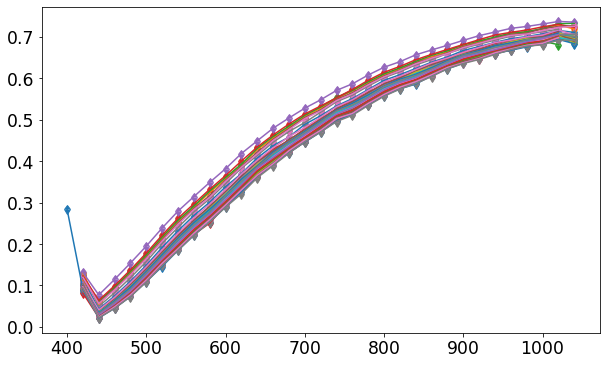

In [26]:
for idx in np.arange(Npos0):
    list_of_datapoints = arr_0_ext[idx]

    wl,eff,eeff = zip(*list_of_datapoints)
    
    plt.errorbar(wl,eff,yerr=eeff,uplims=True, lolims=True)